In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,LSTM,BatchNormalization,MaxPooling2D,Reshape
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from functions import *
from functions import plotting

(2115, 22, 1000)
(2115, 22, 1000)
(2115, 1000)


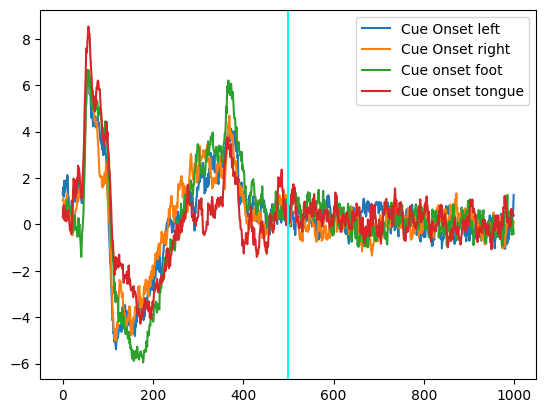

In [2]:
## Loading and visualizing the data

## Loading the dataset
X_test = np.load("../ECEC147project-data/X_test.npy")
y_test = np.load("../ECEC147project-data//y_test.npy")
person_train_valid = np.load("../ECEC147project-data//person_train_valid.npy")
X_train_valid = np.load("../ECEC147project-data/X_train_valid.npy")
print(X_train_valid.shape)
y_train_valid = np.load("../ECEC147project-data/y_train_valid.npy")
person_test = np.load("../ECEC147project-data/person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Visualizing the data
print(X_train_valid.shape)
ch_data = X_train_valid[:,8,:]
print(ch_data.shape)
class_0_ind = np.where(y_train_valid == 0)
ch_data_class_0 = ch_data[class_0_ind]
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)

plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])

In [3]:
def train_data_prep(X,y,sub_sample,average,noise):
    
    total_X = None
    total_y = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,800)
    X = X[:,:,0:800]
    # print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,800) -> (sample,22,800/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    
    
    total_X = X_max
    total_y = y
    # print('Shape of X after maxpooling:',total_X.shape)
    
    # Averaging + noise 
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    # print('Shape of X after averaging+noise and concatenating:',total_X.shape)
    
    # Subsampling
    
    for i in range(sub_sample):
        
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
            
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
        
    
    # print('Shape of X after subsampling and concatenating:',total_X.shape)
    # print('Shape of Y:',total_y.shape)
    return total_X,total_y



def test_data_prep(X):
    
    total_X = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,800)
    X = X[:,:,0:800]
    # print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,800) -> (sample,22,800/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, 2), axis=3)
    
    
    total_X = X_max
    # print('Shape of X after maxpooling:',total_X.shape)
    
    return total_X




# Question 1 Part 1
Optimize the classification accuracy for subject 1. Only trained on subject 1 data.

In [4]:
# Model parameters
learning_rate = 1e-3
epochs = 150

(237, 22, 1000)
(237,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 2s 71ms/step - loss: 1.3845 - accuracy: 0.2715 - val_loss: 1.4052 - val_accuracy: 0.2821
Epoch 2/150
13/13 [==============================] - 1s 62ms/step - loss: 1.3656 - accuracy: 0.3018 - val_loss: 1.4131 - val_accuracy: 0.2821
Epoch 3/150
13/13 [==============================] - 1s 54ms/step - loss: 1.3585 - accuracy: 0.3018 - val_loss: 1.4159 - val_accuracy: 0.2821
Epoch 4/150
13/13 [==============================] - 1s 53ms/step - loss: 1.3384 - accuracy: 0.3497 - val_loss: 1.4035 - val_accuracy: 0.2821
Epoch 5/150
13/13 [==============================] - 1s 63ms/step - loss: 1.3124 - accuracy: 0.3687 - val_loss: 1.3833 - val_accuracy: 0.2885
Epoch 6/150
13/13 [==============================] - 1s 55ms/step - loss: 1.2741 - accuracy: 0.4015 - val_loss: 1.2030 - val_accuracy: 0.5385
Epoch 7/150
13/13 [==============================] - 1s 53ms/step - loss: 1.2182 - accuracy: 0.4369 - val_loss: 1.1122 - val_accuracy: 0.5641
Epoch 

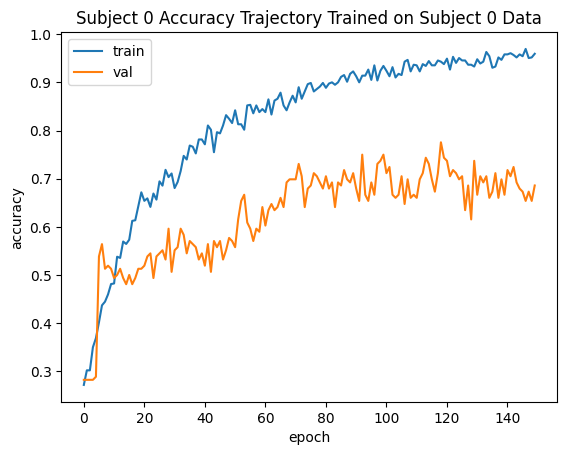

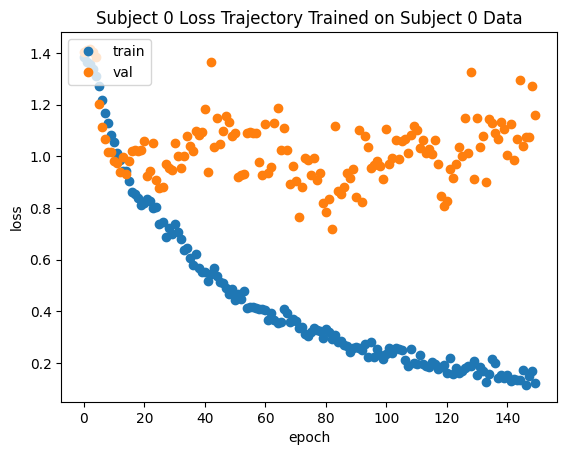

Test accuracy of the hybrid CNN-LSTM model: 0.5600000023841858
(236, 22, 1000)
(236,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 3s 89ms/step - loss: 1.3894 - accuracy: 0.2551 - val_loss: 1.3724 - val_accuracy: 0.3590
Epoch 2/150
13/13 [==============================] - 1s 61ms/step - loss: 1.3848 - accuracy: 0.2563 - val_loss: 1.3736 - val_accuracy: 0.2564
Epoch 3/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3744 - accuracy: 0.2881 - val_loss: 1.3716 - val_accuracy: 0.2436
Epoch 4/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3682 - accuracy: 0.3261 - val_loss: 1.3644 - val_accuracy: 0.2628
Epoch 5/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3626 - accuracy: 0.2919 - val_loss: 1.3546 - val_accuracy: 0.2051
Epoch 6/150
13/13 [==============================] - 1s 67ms/step - loss: 1.3425 - accuracy: 0.3629 - val_loss: 1.3718 - val_accuracy: 0.2051
Epoch 7/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3270 - accuracy: 0.3756 - val_loss: 1.3949 - val_accuracy: 0.1987
Epoch 

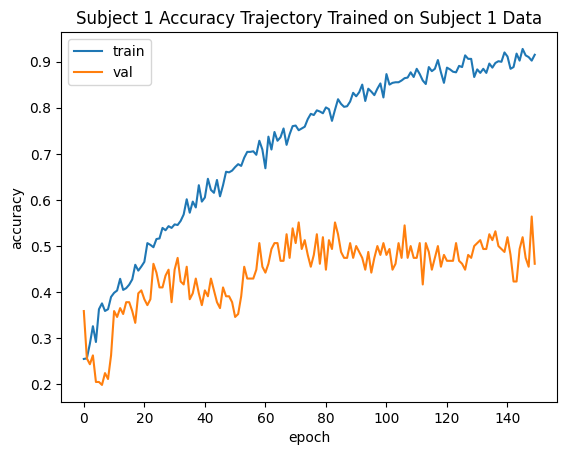

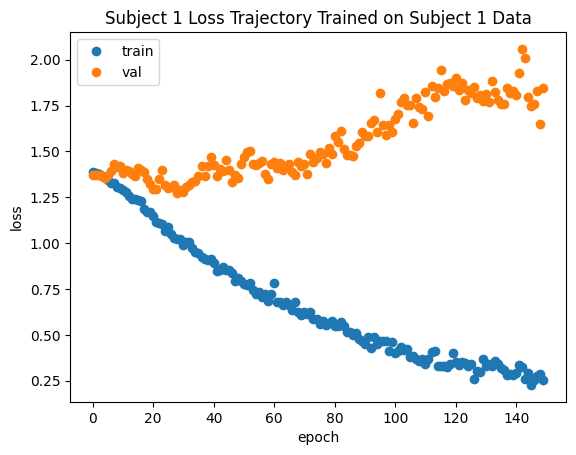

Test accuracy of the hybrid CNN-LSTM model: 0.47999998927116394
(236, 22, 1000)
(236,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 2s 78ms/step - loss: 1.4022 - accuracy: 0.2640 - val_loss: 1.3960 - val_accuracy: 0.2692
Epoch 2/150
13/13 [==============================] - 1s 61ms/step - loss: 1.3947 - accuracy: 0.2665 - val_loss: 1.3888 - val_accuracy: 0.3013
Epoch 3/150
13/13 [==============================] - 1s 63ms/step - loss: 1.3909 - accuracy: 0.2919 - val_loss: 1.3941 - val_accuracy: 0.3013
Epoch 4/150
13/13 [==============================] - 1s 64ms/step - loss: 1.3720 - accuracy: 0.3185 - val_loss: 1.3910 - val_accuracy: 0.3077
Epoch 5/150
13/13 [==============================] - 1s 62ms/step - loss: 1.3689 - accuracy: 0.3135 - val_loss: 1.3729 - val_accuracy: 0.3974
Epoch 6/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3720 - accuracy: 0.2957 - val_loss: 1.3621 - val_accuracy: 0.4487
Epoch 7/150
13/13 [==============================] - 1s 65ms/step - loss: 1.3485 - accuracy: 0.3325 - val_loss: 1.3632 - val_accuracy: 0.3654
Epoch 

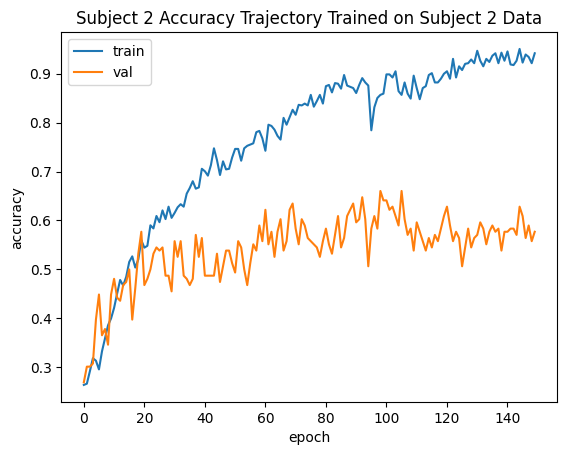

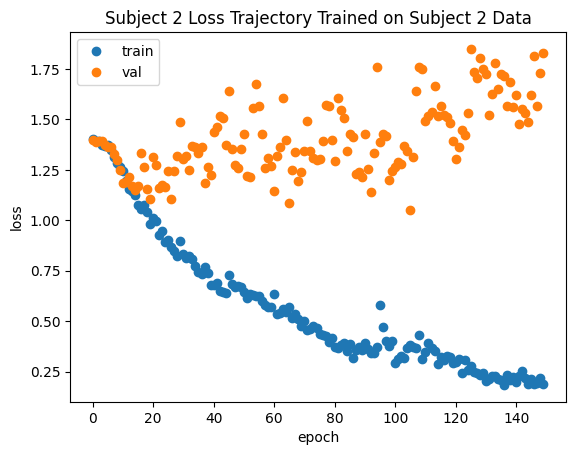

Test accuracy of the hybrid CNN-LSTM model: 0.699999988079071
(234, 22, 1000)
(234,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 2s 75ms/step - loss: 1.3900 - accuracy: 0.2731 - val_loss: 1.3802 - val_accuracy: 0.3718
Epoch 2/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3840 - accuracy: 0.2782 - val_loss: 1.3803 - val_accuracy: 0.2308
Epoch 3/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3768 - accuracy: 0.3128 - val_loss: 1.3695 - val_accuracy: 0.3654
Epoch 4/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3625 - accuracy: 0.3231 - val_loss: 1.3571 - val_accuracy: 0.3526
Epoch 5/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3480 - accuracy: 0.3410 - val_loss: 1.3308 - val_accuracy: 0.4359
Epoch 6/150
13/13 [==============================] - 1s 66ms/step - loss: 1.3457 - accuracy: 0.3462 - val_loss: 1.3095 - val_accuracy: 0.4359
Epoch 7/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3297 - accuracy: 0.3667 - val_loss: 1.2999 - val_accuracy: 0.4359
Epoch 

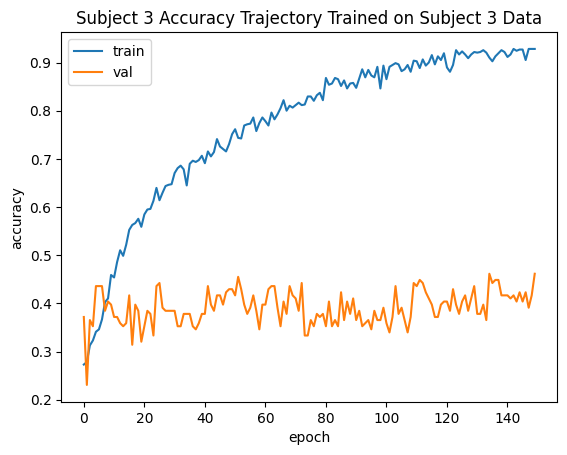

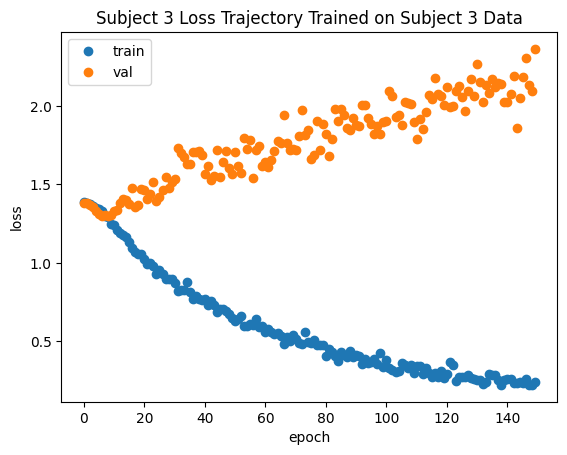

Test accuracy of the hybrid CNN-LSTM model: 0.46000000834465027
(235, 22, 1000)
(235,)
(47, 22, 1000)
(47,)


Epoch 1/150
13/13 [==============================] - 2s 73ms/step - loss: 1.3901 - accuracy: 0.2857 - val_loss: 1.3835 - val_accuracy: 0.3205
Epoch 2/150
13/13 [==============================] - 1s 56ms/step - loss: 1.3646 - accuracy: 0.3112 - val_loss: 1.3912 - val_accuracy: 0.3013
Epoch 3/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3579 - accuracy: 0.3010 - val_loss: 1.3921 - val_accuracy: 0.2692
Epoch 4/150
13/13 [==============================] - 1s 56ms/step - loss: 1.3500 - accuracy: 0.3316 - val_loss: 1.3951 - val_accuracy: 0.3141
Epoch 5/150
13/13 [==============================] - 1s 63ms/step - loss: 1.3375 - accuracy: 0.3508 - val_loss: 1.3793 - val_accuracy: 0.3269
Epoch 6/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3183 - accuracy: 0.3393 - val_loss: 1.3402 - val_accuracy: 0.3526
Epoch 7/150
13/13 [==============================] - 1s 57ms/step - loss: 1.3082 - accuracy: 0.3827 - val_loss: 1.2892 - val_accuracy: 0.4615
Epoch 

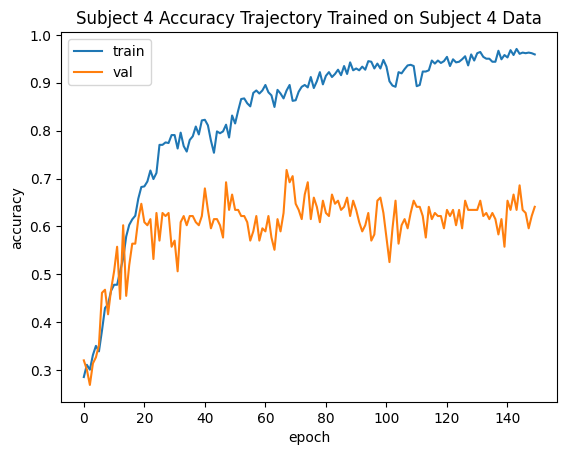

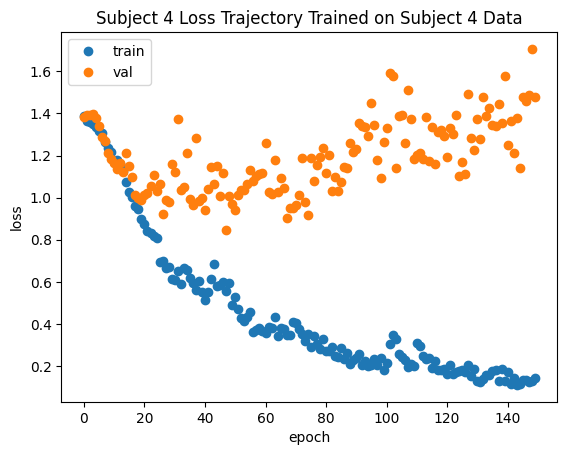

Test accuracy of the hybrid CNN-LSTM model: 0.7446808218955994
(236, 22, 1000)
(236,)
(49, 22, 1000)
(49,)


Epoch 1/150
13/13 [==============================] - 2s 74ms/step - loss: 1.3931 - accuracy: 0.2462 - val_loss: 1.3664 - val_accuracy: 0.3846
Epoch 2/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3711 - accuracy: 0.3135 - val_loss: 1.3686 - val_accuracy: 0.3846
Epoch 3/150
13/13 [==============================] - 1s 57ms/step - loss: 1.3694 - accuracy: 0.3160 - val_loss: 1.3655 - val_accuracy: 0.3718
Epoch 4/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3486 - accuracy: 0.3528 - val_loss: 1.3652 - val_accuracy: 0.3397
Epoch 5/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3330 - accuracy: 0.3604 - val_loss: 1.3590 - val_accuracy: 0.3462
Epoch 6/150
13/13 [==============================] - 1s 64ms/step - loss: 1.3061 - accuracy: 0.3896 - val_loss: 1.3589 - val_accuracy: 0.3462
Epoch 7/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3031 - accuracy: 0.3820 - val_loss: 1.4081 - val_accuracy: 0.3269
Epoch 

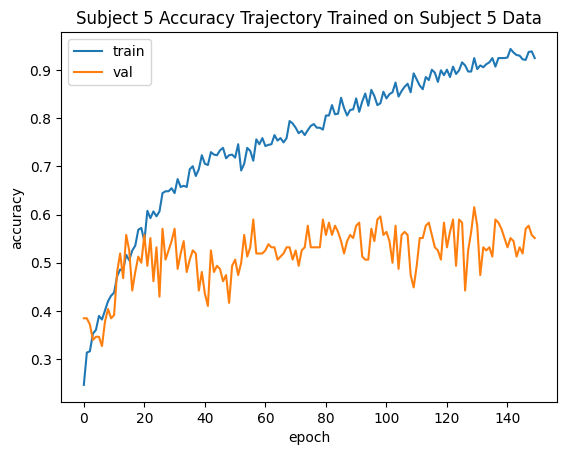

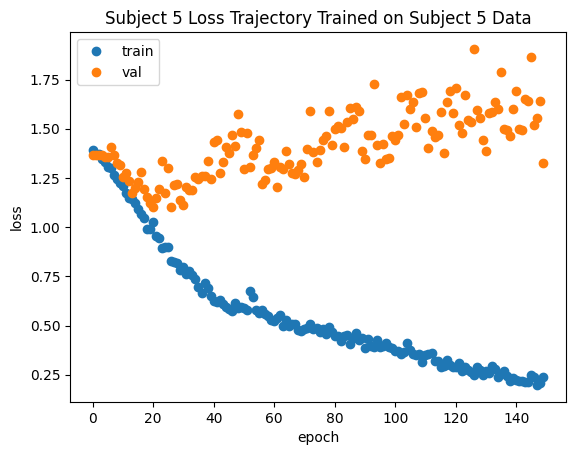

Test accuracy of the hybrid CNN-LSTM model: 0.44897958636283875
(238, 22, 1000)
(238,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 3s 77ms/step - loss: 1.3998 - accuracy: 0.2475 - val_loss: 1.3806 - val_accuracy: 0.2564
Epoch 2/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3768 - accuracy: 0.2827 - val_loss: 1.3837 - val_accuracy: 0.2564
Epoch 3/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3629 - accuracy: 0.3078 - val_loss: 1.3795 - val_accuracy: 0.2564
Epoch 4/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3606 - accuracy: 0.3266 - val_loss: 1.3721 - val_accuracy: 0.2564
Epoch 5/150
13/13 [==============================] - 1s 56ms/step - loss: 1.3538 - accuracy: 0.3379 - val_loss: 1.3628 - val_accuracy: 0.2692
Epoch 6/150
13/13 [==============================] - 1s 57ms/step - loss: 1.3476 - accuracy: 0.3354 - val_loss: 1.3523 - val_accuracy: 0.3462
Epoch 7/150
13/13 [==============================] - 1s 57ms/step - loss: 1.3342 - accuracy: 0.3656 - val_loss: 1.3684 - val_accuracy: 0.2564
Epoch 

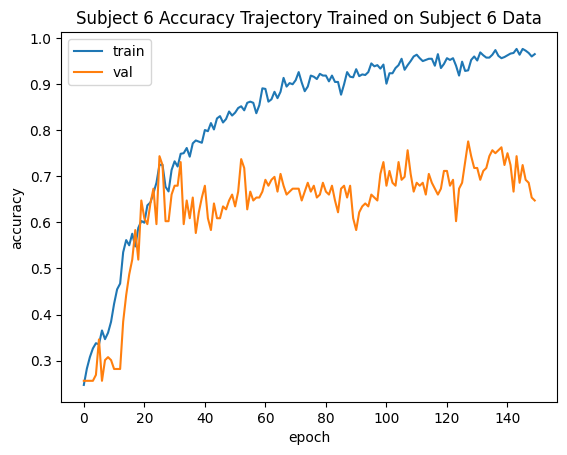

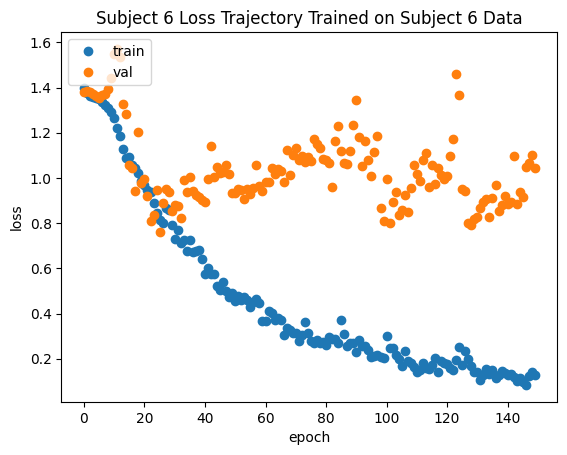

Test accuracy of the hybrid CNN-LSTM model: 0.7200000286102295
(232, 22, 1000)
(232,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 2s 76ms/step - loss: 1.3836 - accuracy: 0.2680 - val_loss: 1.3812 - val_accuracy: 0.2368
Epoch 2/150
13/13 [==============================] - 1s 55ms/step - loss: 1.3649 - accuracy: 0.3183 - val_loss: 1.3677 - val_accuracy: 0.2368
Epoch 3/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3470 - accuracy: 0.3389 - val_loss: 1.3420 - val_accuracy: 0.3224
Epoch 4/150
13/13 [==============================] - 1s 61ms/step - loss: 1.3208 - accuracy: 0.3737 - val_loss: 1.3152 - val_accuracy: 0.3158
Epoch 5/150
13/13 [==============================] - 1s 58ms/step - loss: 1.2858 - accuracy: 0.3660 - val_loss: 1.2447 - val_accuracy: 0.4868
Epoch 6/150
13/13 [==============================] - 1s 55ms/step - loss: 1.2421 - accuracy: 0.4162 - val_loss: 1.2157 - val_accuracy: 0.4474
Epoch 7/150
13/13 [==============================] - 1s 57ms/step - loss: 1.1969 - accuracy: 0.4253 - val_loss: 1.1811 - val_accuracy: 0.4737
Epoch 

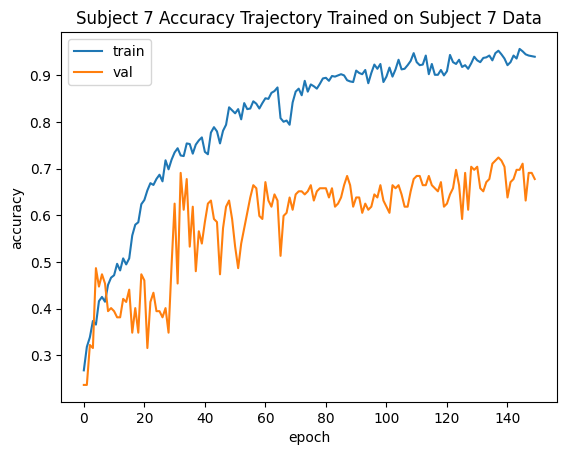

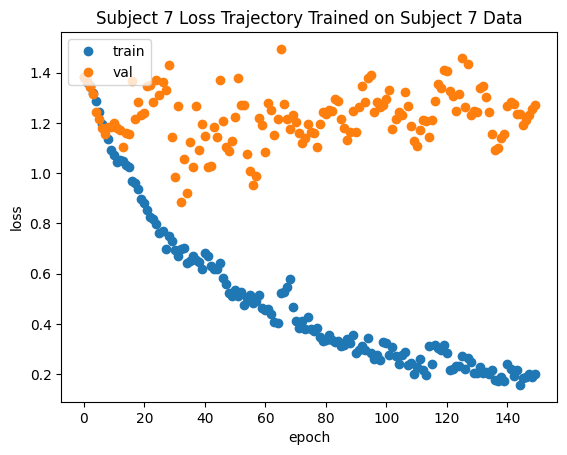

Test accuracy of the hybrid CNN-LSTM model: 0.47999998927116394
(231, 22, 1000)
(231,)
(47, 22, 1000)
(47,)


Epoch 1/150
13/13 [==============================] - 2s 81ms/step - loss: 1.3736 - accuracy: 0.2837 - val_loss: 1.3844 - val_accuracy: 0.2632
Epoch 2/150
13/13 [==============================] - 1s 57ms/step - loss: 1.3369 - accuracy: 0.3536 - val_loss: 1.3885 - val_accuracy: 0.2632
Epoch 3/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3118 - accuracy: 0.3718 - val_loss: 1.4009 - val_accuracy: 0.2632
Epoch 4/150
13/13 [==============================] - 1s 57ms/step - loss: 1.2791 - accuracy: 0.4236 - val_loss: 1.3944 - val_accuracy: 0.2632
Epoch 5/150
13/13 [==============================] - 1s 59ms/step - loss: 1.2423 - accuracy: 0.4365 - val_loss: 1.3457 - val_accuracy: 0.2697
Epoch 6/150
13/13 [==============================] - 1s 59ms/step - loss: 1.2109 - accuracy: 0.4611 - val_loss: 1.2775 - val_accuracy: 0.3750
Epoch 7/150
13/13 [==============================] - 1s 59ms/step - loss: 1.1842 - accuracy: 0.4845 - val_loss: 1.2352 - val_accuracy: 0.4013
Epoch 

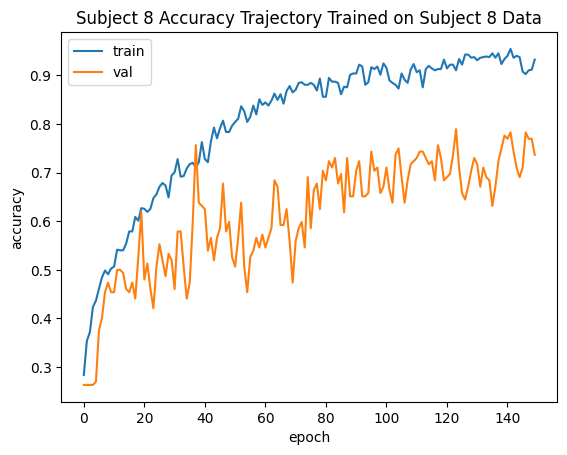

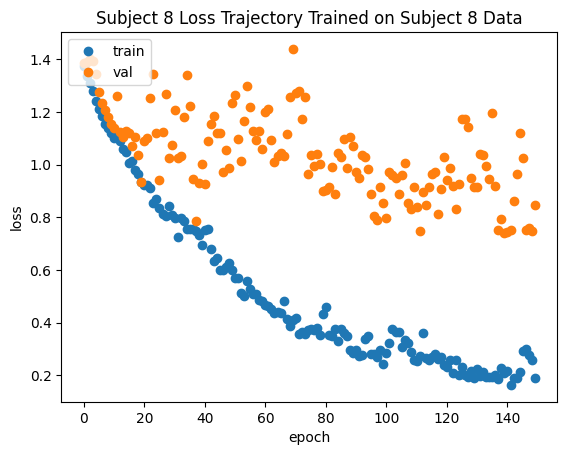

Test accuracy of the hybrid CNN-LSTM model: 0.6595744490623474


In [5]:
for id in range(9):
    subject_train_valid_ind = np.where(person_train_valid == id)
    subject_train_valid_ind = subject_train_valid_ind[0]
    subject_X_train_valid = X_train_valid[subject_train_valid_ind]
    subject_y_train_valid = y_train_valid[subject_train_valid_ind]
    subject_test_ind = np.where(person_test == id)
    subject_test_ind = subject_test_ind[0]
    subject_X_test = X_test[subject_test_ind]
    subject_y_test = y_test[subject_test_ind]
    print(np.shape(subject_X_train_valid))
    print(np.shape(subject_y_train_valid))
    print(np.shape(subject_X_test))
    print(np.shape(subject_y_test))
    subject_X_test_prep = test_data_prep(subject_X_test) 
    ind_valid = np.random.choice(len(subject_X_train_valid), int(np.floor(len(subject_X_train_valid)/6)), replace=False)
    ind_train = np.array(list(set(range(len(subject_X_train_valid))).difference(set(ind_valid))))
    (subject_x_train_split, subject_x_valid_split) = subject_X_train_valid[ind_train], subject_X_train_valid[ind_valid] 
    (subject_y_train_split, subject_y_valid_split) = subject_y_train_valid[ind_train], subject_y_train_valid[ind_valid]
    subject_x_train,subject_y_train = train_data_prep(subject_x_train_split,subject_y_train_split,2,2,True)
    subject_x_valid,subject_y_valid = train_data_prep(subject_x_valid_split,subject_y_valid_split,2,2,True)
    subject_y_train = to_categorical(subject_y_train, 4)
    subject_y_valid = to_categorical(subject_y_valid, 4)
    subject_y_test = to_categorical(subject_y_test, 4)
    subject_x_train = subject_x_train.reshape(subject_x_train.shape[0], subject_x_train.shape[1], subject_x_train.shape[2], 1)
    subject_x_valid = subject_x_valid.reshape(subject_x_valid.shape[0], subject_x_valid.shape[1], subject_x_train.shape[2], 1)
    subject_x_test = subject_X_test_prep.reshape(subject_X_test_prep.shape[0], subject_X_test_prep.shape[1], subject_X_test_prep.shape[2], 1)
    subject_x_train = np.swapaxes(subject_x_train, 1,3)
    subject_x_train = np.swapaxes(subject_x_train, 1,2)
    subject_x_valid = np.swapaxes(subject_x_valid, 1,3)
    subject_x_valid = np.swapaxes(subject_x_valid, 1,2)
    subject_x_test = np.swapaxes(subject_x_test, 1,3)
    subject_x_test = np.swapaxes(subject_x_test, 1,2)
    hybrid_cnn_lstm_model = hybrid()
    # ADAM
    # Compiling the model
    hybrid_cnn_lstm_optimizer = keras.optimizers.Adam(lr=learning_rate)
    hybrid_cnn_lstm_model.compile(loss='categorical_crossentropy',
                    optimizer=hybrid_cnn_lstm_optimizer,
                    metrics=['accuracy'])

    # Training and validating the model
    hybrid_cnn_lstm_model_results = hybrid_cnn_lstm_model.fit(subject_x_train,
                subject_y_train,
                batch_size=64,
                epochs=epochs,
                validation_data=(subject_x_valid, subject_y_valid), verbose=True)

    # Plotting accuracy trajectory
    plt.plot( hybrid_cnn_lstm_model_results.history['accuracy'])
    plt.plot( hybrid_cnn_lstm_model_results.history['val_accuracy'])
    plt.title('Subject ' + str(id) + ' Accuracy Trajectory Trained on Subject ' + str(id) + ' Data')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot( hybrid_cnn_lstm_model_results.history['loss'],'o')
    plt.plot( hybrid_cnn_lstm_model_results.history['val_loss'],'o')
    plt.title('Subject '  + str(id) + ' Loss Trajectory Trained on Subject '  + str(id) + ' Data')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()



    hybrid_cnn_lstm_score = hybrid_cnn_lstm_model.evaluate(subject_x_test, subject_y_test, verbose=0)
    print('Test accuracy of the hybrid CNN-LSTM model:',hybrid_cnn_lstm_score[1])
    

# Question 1 Part 2
 Does classification of one subject improve if the model is trained across all subjects?

(237, 22, 1000)
(237,)
(50, 22, 1000)
(50,)
(1878, 22, 1000)
(1878,)
(1878, 22, 1000)
(1878,)


(7052, 400, 1, 22)
(1408, 400, 1, 22)
(7052, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 26s 213ms/step - loss: 1.3886 - accuracy: 0.2710 - val_loss: 1.3710 - val_accuracy: 0.3026
Epoch 2/150
111/111 [==============================] - 23s 211ms/step - loss: 1.3675 - accuracy: 0.2986 - val_loss: 1.3217 - val_accuracy: 0.3714
Epoch 3/150
111/111 [==============================] - 302s 3s/step - loss: 1.3195 - accuracy: 0.3590 - val_loss: 1.2511 - val_accuracy: 0.4055
Epoch 4/150
111/111 [==============================] - 629s 6s/step - loss: 1.2713 - accuracy: 0.3822 - val_loss: 1.2215 - val_accuracy: 0.4467
Epoch 5/150
111/111 [==============================] - 536s 5s/step - loss: 1.2460 - accuracy: 0.4098 - val_loss: 1.1966 - val_accuracy: 0.4808
Epoch 6/150
111/111 [==============================] - 35s 320ms/step - loss: 1.2069 - accuracy: 0.4394 - val_loss: 1.1462 - val_accuracy: 0.5021
Epoch 7/150
111/111 [==============================] - 24s 214ms/step - 

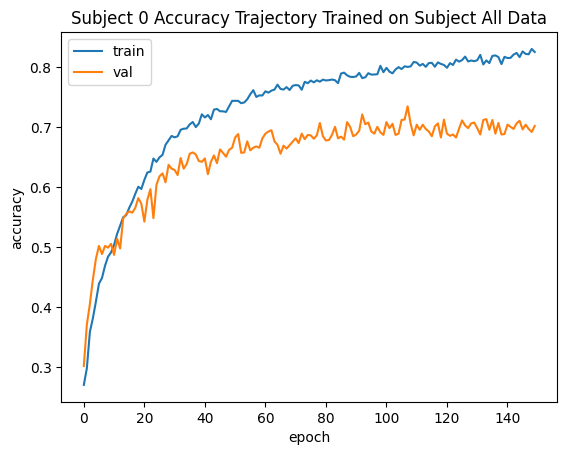

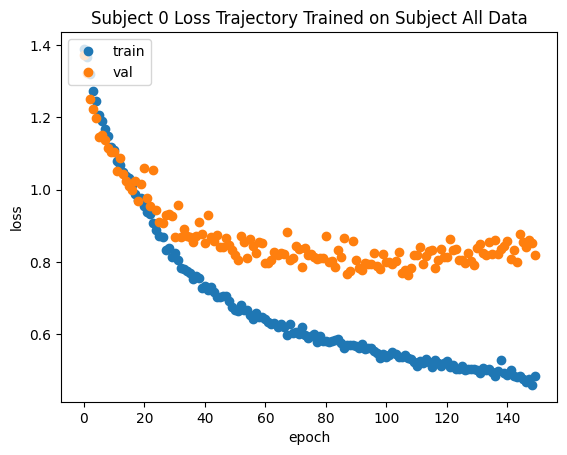

Test accuracy of the hybrid CNN-LSTM model: 0.6200000047683716
(236, 22, 1000)
(236,)
(50, 22, 1000)
(50,)
(1878, 22, 1000)
(1878,)
(1878, 22, 1000)
(1878,)


(7048, 400, 1, 22)
(1408, 400, 1, 22)
(7048, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 62ms/step - loss: 1.3876 - accuracy: 0.2771 - val_loss: 1.3602 - val_accuracy: 0.3402
Epoch 2/150
111/111 [==============================] - 7s 60ms/step - loss: 1.3494 - accuracy: 0.3299 - val_loss: 1.3347 - val_accuracy: 0.3530
Epoch 3/150
111/111 [==============================] - 7s 60ms/step - loss: 1.2922 - accuracy: 0.3932 - val_loss: 1.3328 - val_accuracy: 0.3487
Epoch 4/150
111/111 [==============================] - 7s 60ms/step - loss: 1.2511 - accuracy: 0.4279 - val_loss: 1.3230 - val_accuracy: 0.3658
Epoch 5/150
111/111 [==============================] - 7s 61ms/step - loss: 1.2116 - accuracy: 0.4550 - val_loss: 1.2465 - val_accuracy: 0.4446
Epoch 6/150
111/111 [==============================] - 7s 61ms/step - loss: 1.1894 - accuracy: 0.4586 - val_loss: 1.3293 - val_accuracy: 0.3835
Epoch 7/150
111/111 [==============================] - 7s 60ms/step - loss: 1.

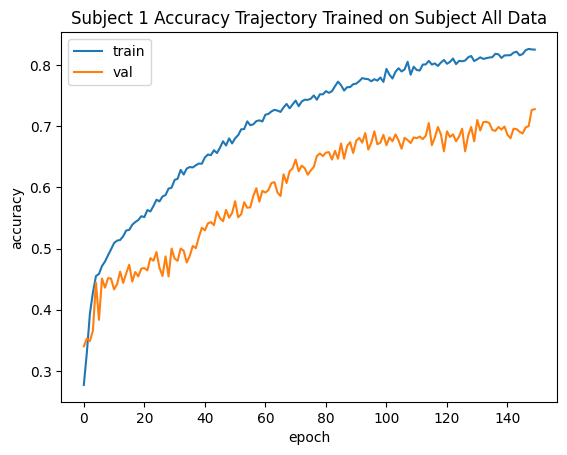

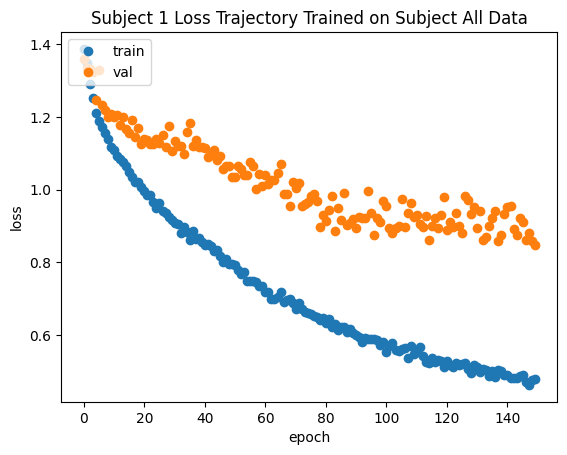

Test accuracy of the hybrid CNN-LSTM model: 0.46000000834465027
(236, 22, 1000)
(236,)
(50, 22, 1000)
(50,)
(1878, 22, 1000)
(1878,)
(1878, 22, 1000)
(1878,)


(7048, 400, 1, 22)
(1408, 400, 1, 22)
(7048, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 61ms/step - loss: 1.3668 - accuracy: 0.2998 - val_loss: 1.3470 - val_accuracy: 0.3352
Epoch 2/150
111/111 [==============================] - 6s 58ms/step - loss: 1.3023 - accuracy: 0.3695 - val_loss: 1.3238 - val_accuracy: 0.3679
Epoch 3/150
111/111 [==============================] - 6s 59ms/step - loss: 1.2652 - accuracy: 0.3929 - val_loss: 1.2737 - val_accuracy: 0.4268
Epoch 4/150
111/111 [==============================] - 6s 58ms/step - loss: 1.2352 - accuracy: 0.4269 - val_loss: 1.2598 - val_accuracy: 0.4467
Epoch 5/150
111/111 [==============================] - 7s 59ms/step - loss: 1.2137 - accuracy: 0.4447 - val_loss: 1.2458 - val_accuracy: 0.4276
Epoch 6/150
111/111 [==============================] - 7s 59ms/step - loss: 1.1817 - accuracy: 0.4674 - val_loss: 1.2199 - val_accuracy: 0.4474
Epoch 7/150
111/111 [==============================] - 7s 59ms/step - loss: 1.

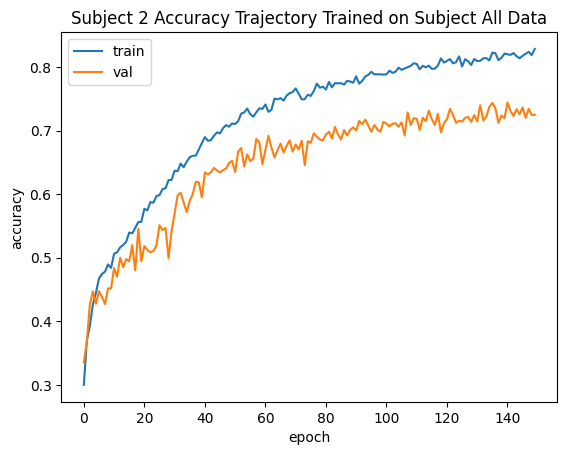

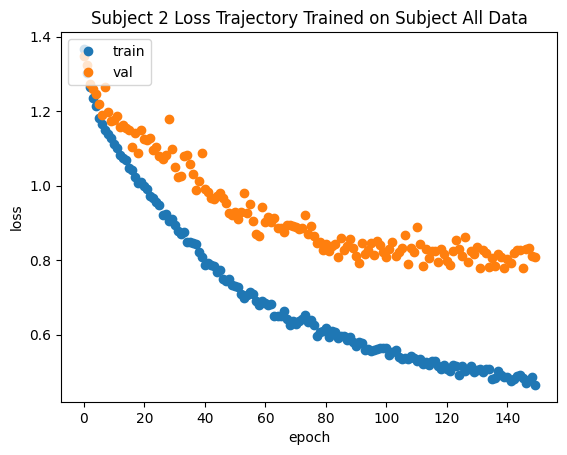

Test accuracy of the hybrid CNN-LSTM model: 0.800000011920929
(234, 22, 1000)
(234,)
(50, 22, 1000)
(50,)
(1878, 22, 1000)
(1878,)
(1878, 22, 1000)
(1878,)


(7040, 400, 1, 22)
(1408, 400, 1, 22)
(7040, 4)
(1408, 4)
Epoch 1/150
110/110 [==============================] - 7s 55ms/step - loss: 1.3850 - accuracy: 0.2776 - val_loss: 1.3675 - val_accuracy: 0.2919
Epoch 2/150
110/110 [==============================] - 6s 53ms/step - loss: 1.3452 - accuracy: 0.3396 - val_loss: 1.3360 - val_accuracy: 0.3153
Epoch 3/150
110/110 [==============================] - 6s 54ms/step - loss: 1.2821 - accuracy: 0.3942 - val_loss: 1.2771 - val_accuracy: 0.4027
Epoch 4/150
110/110 [==============================] - 6s 53ms/step - loss: 1.2411 - accuracy: 0.4247 - val_loss: 1.2794 - val_accuracy: 0.4013
Epoch 5/150
110/110 [==============================] - 6s 53ms/step - loss: 1.1936 - accuracy: 0.4588 - val_loss: 1.2461 - val_accuracy: 0.4119
Epoch 6/150
110/110 [==============================] - 6s 54ms/step - loss: 1.1776 - accuracy: 0.4695 - val_loss: 1.2491 - val_accuracy: 0.4162
Epoch 7/150
110/110 [==============================] - 6s 53ms/step - loss: 1.

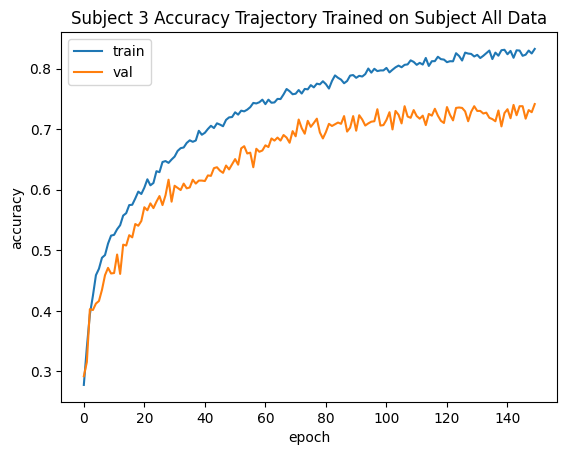

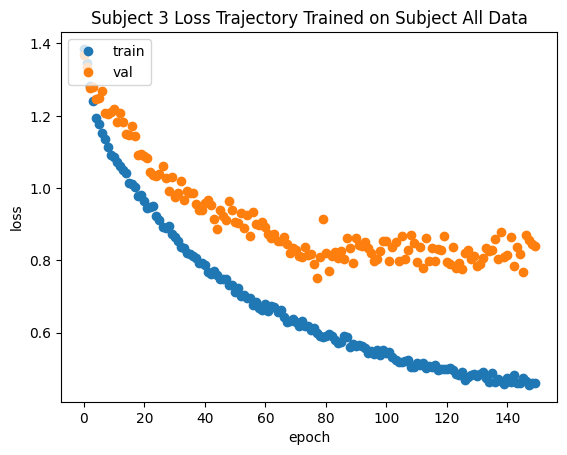

Test accuracy of the hybrid CNN-LSTM model: 0.6000000238418579
(235, 22, 1000)
(235,)
(47, 22, 1000)
(47,)
(1878, 22, 1000)
(1878,)
(1878, 22, 1000)
(1878,)


(7044, 400, 1, 22)
(1408, 400, 1, 22)
(7044, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 9s 63ms/step - loss: 1.3800 - accuracy: 0.2858 - val_loss: 1.3434 - val_accuracy: 0.3608
Epoch 2/150
111/111 [==============================] - 7s 60ms/step - loss: 1.3482 - accuracy: 0.3409 - val_loss: 1.2978 - val_accuracy: 0.4134
Epoch 3/150
111/111 [==============================] - 7s 61ms/step - loss: 1.2959 - accuracy: 0.3931 - val_loss: 1.3070 - val_accuracy: 0.4325
Epoch 4/150
111/111 [==============================] - 7s 60ms/step - loss: 1.2490 - accuracy: 0.4310 - val_loss: 1.2200 - val_accuracy: 0.4531
Epoch 5/150
111/111 [==============================] - 7s 61ms/step - loss: 1.1970 - accuracy: 0.4553 - val_loss: 1.1771 - val_accuracy: 0.4602
Epoch 6/150
111/111 [==============================] - 7s 60ms/step - loss: 1.1709 - accuracy: 0.4652 - val_loss: 1.1847 - val_accuracy: 0.4723
Epoch 7/150
111/111 [==============================] - 7s 61ms/step - loss: 1.

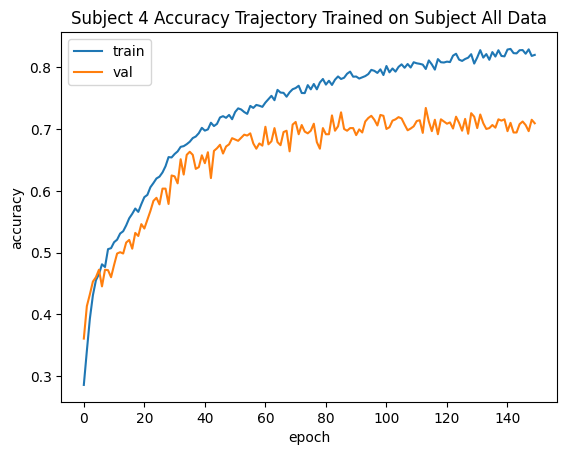

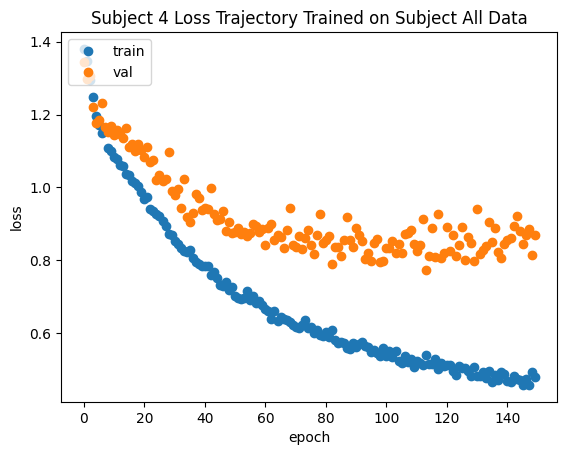

Test accuracy of the hybrid CNN-LSTM model: 0.8085106611251831
(236, 22, 1000)
(236,)
(49, 22, 1000)
(49,)
(1878, 22, 1000)
(1878,)
(1878, 22, 1000)
(1878,)


(7048, 400, 1, 22)
(1408, 400, 1, 22)
(7048, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 62ms/step - loss: 1.3858 - accuracy: 0.2805 - val_loss: 1.3601 - val_accuracy: 0.3104
Epoch 2/150
111/111 [==============================] - 7s 59ms/step - loss: 1.3292 - accuracy: 0.3615 - val_loss: 1.3244 - val_accuracy: 0.3537
Epoch 3/150
111/111 [==============================] - 7s 59ms/step - loss: 1.2765 - accuracy: 0.4065 - val_loss: 1.2427 - val_accuracy: 0.4062
Epoch 4/150
111/111 [==============================] - 7s 59ms/step - loss: 1.2229 - accuracy: 0.4377 - val_loss: 1.1930 - val_accuracy: 0.4695
Epoch 5/150
111/111 [==============================] - 7s 59ms/step - loss: 1.2028 - accuracy: 0.4519 - val_loss: 1.2215 - val_accuracy: 0.4517
Epoch 6/150
111/111 [==============================] - 7s 60ms/step - loss: 1.1841 - accuracy: 0.4715 - val_loss: 1.1846 - val_accuracy: 0.4737
Epoch 7/150
111/111 [==============================] - 7s 60ms/step - loss: 1.

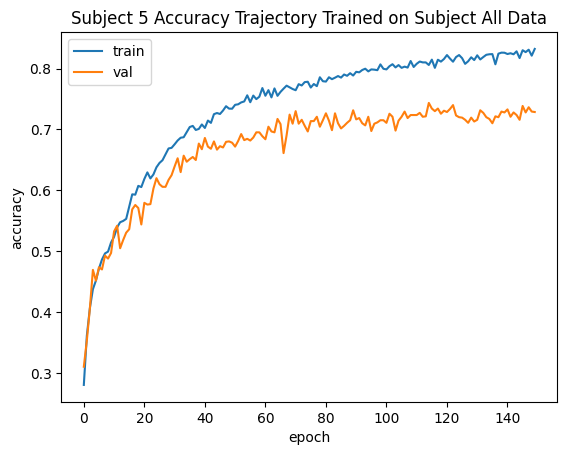

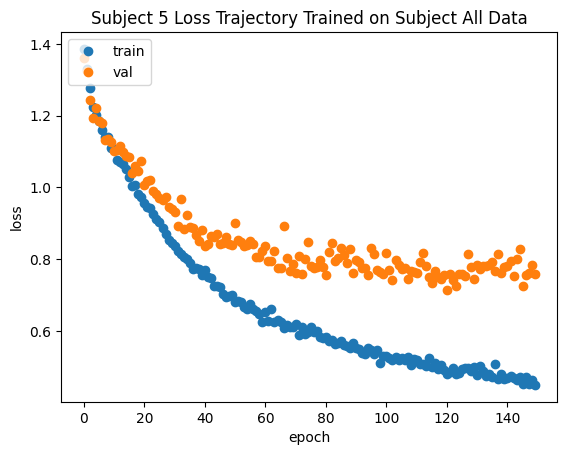

Test accuracy of the hybrid CNN-LSTM model: 0.6326530575752258
(238, 22, 1000)
(238,)
(50, 22, 1000)
(50,)
(1878, 22, 1000)
(1878,)
(1878, 22, 1000)
(1878,)


(7056, 400, 1, 22)
(1408, 400, 1, 22)
(7056, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 61ms/step - loss: 1.3778 - accuracy: 0.2832 - val_loss: 1.3388 - val_accuracy: 0.3629
Epoch 2/150
111/111 [==============================] - 6s 58ms/step - loss: 1.3169 - accuracy: 0.3800 - val_loss: 1.2493 - val_accuracy: 0.3935
Epoch 3/150
111/111 [==============================] - 6s 57ms/step - loss: 1.2622 - accuracy: 0.4161 - val_loss: 1.2782 - val_accuracy: 0.3906
Epoch 4/150
111/111 [==============================] - 6s 59ms/step - loss: 1.2279 - accuracy: 0.4453 - val_loss: 1.2549 - val_accuracy: 0.3871
Epoch 5/150
111/111 [==============================] - 6s 58ms/step - loss: 1.1973 - accuracy: 0.4616 - val_loss: 1.2285 - val_accuracy: 0.4134
Epoch 6/150
111/111 [==============================] - 7s 59ms/step - loss: 1.1794 - accuracy: 0.4731 - val_loss: 1.1093 - val_accuracy: 0.5142
Epoch 7/150
111/111 [==============================] - 7s 59ms/step - loss: 1.

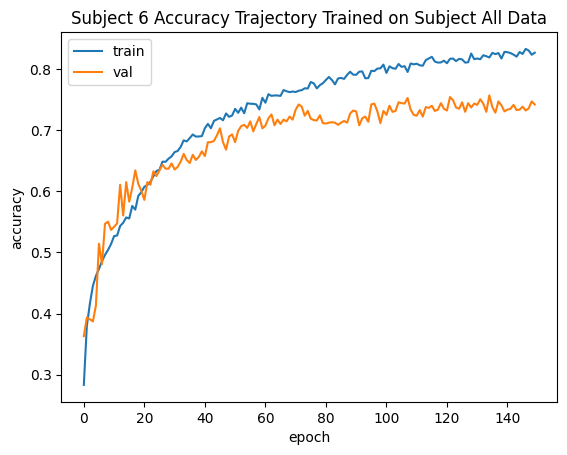

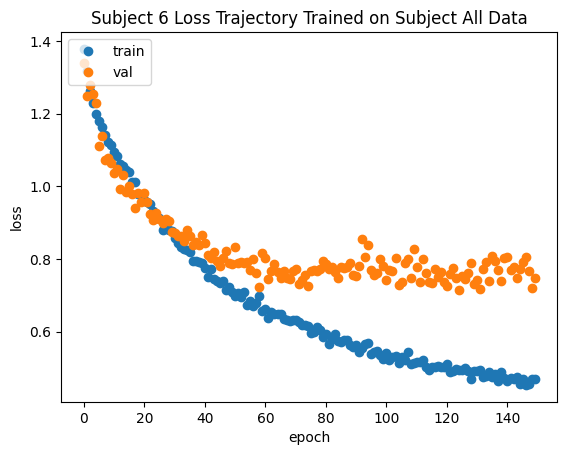

Test accuracy of the hybrid CNN-LSTM model: 0.5799999833106995
(232, 22, 1000)
(232,)
(50, 22, 1000)
(50,)
(1878, 22, 1000)
(1878,)
(1878, 22, 1000)
(1878,)


(7036, 400, 1, 22)
(1404, 400, 1, 22)
(7036, 4)
(1404, 4)
Epoch 1/150
110/110 [==============================] - 8s 61ms/step - loss: 1.3822 - accuracy: 0.2938 - val_loss: 1.3594 - val_accuracy: 0.3155
Epoch 2/150
110/110 [==============================] - 7s 60ms/step - loss: 1.3269 - accuracy: 0.3623 - val_loss: 1.2952 - val_accuracy: 0.3689
Epoch 3/150
110/110 [==============================] - 7s 60ms/step - loss: 1.2495 - accuracy: 0.4277 - val_loss: 1.3194 - val_accuracy: 0.3632
Epoch 4/150
110/110 [==============================] - 7s 60ms/step - loss: 1.2049 - accuracy: 0.4527 - val_loss: 1.2182 - val_accuracy: 0.4338
Epoch 5/150
110/110 [==============================] - 7s 60ms/step - loss: 1.1708 - accuracy: 0.4784 - val_loss: 1.2824 - val_accuracy: 0.3981
Epoch 6/150
110/110 [==============================] - 7s 60ms/step - loss: 1.1465 - accuracy: 0.4861 - val_loss: 1.2290 - val_accuracy: 0.3996
Epoch 7/150
110/110 [==============================] - 7s 62ms/step - loss: 1.

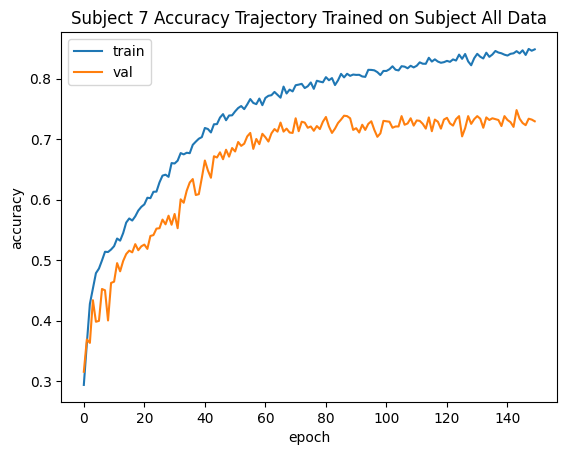

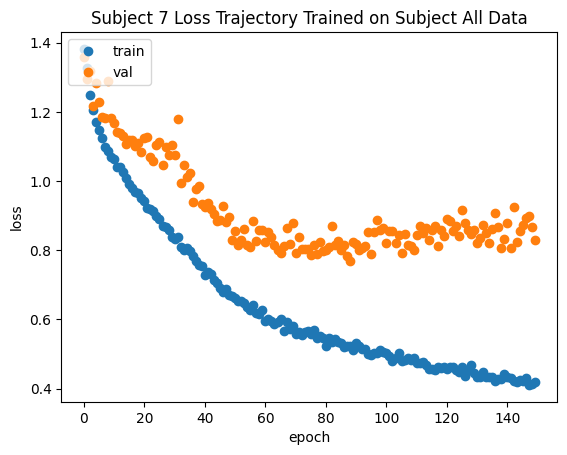

Test accuracy of the hybrid CNN-LSTM model: 0.7400000095367432
(231, 22, 1000)
(231,)
(47, 22, 1000)
(47,)
(1878, 22, 1000)
(1878,)
(1878, 22, 1000)
(1878,)


(7032, 400, 1, 22)
(1404, 400, 1, 22)
(7032, 4)
(1404, 4)
Epoch 1/150
110/110 [==============================] - 8s 62ms/step - loss: 1.3831 - accuracy: 0.2715 - val_loss: 1.3418 - val_accuracy: 0.3846
Epoch 2/150
110/110 [==============================] - 7s 61ms/step - loss: 1.3315 - accuracy: 0.3559 - val_loss: 1.2698 - val_accuracy: 0.4138
Epoch 3/150
110/110 [==============================] - 7s 62ms/step - loss: 1.2757 - accuracy: 0.3948 - val_loss: 1.2170 - val_accuracy: 0.4644
Epoch 4/150
110/110 [==============================] - 7s 63ms/step - loss: 1.2389 - accuracy: 0.4252 - val_loss: 1.1470 - val_accuracy: 0.4843
Epoch 5/150
110/110 [==============================] - 7s 60ms/step - loss: 1.2082 - accuracy: 0.4342 - val_loss: 1.1551 - val_accuracy: 0.4836
Epoch 6/150
110/110 [==============================] - 7s 63ms/step - loss: 1.1916 - accuracy: 0.4455 - val_loss: 1.1151 - val_accuracy: 0.5071
Epoch 7/150
110/110 [==============================] - 7s 62ms/step - loss: 1.

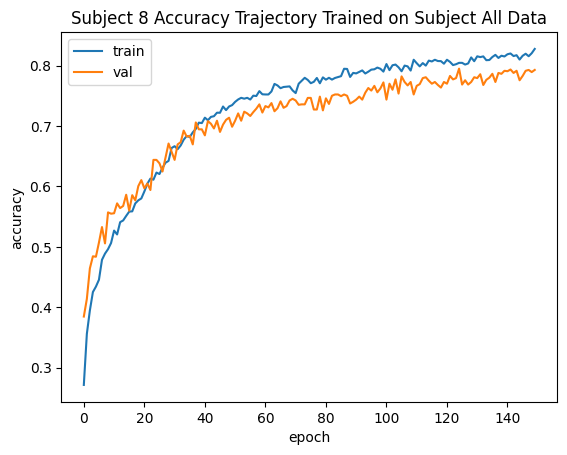

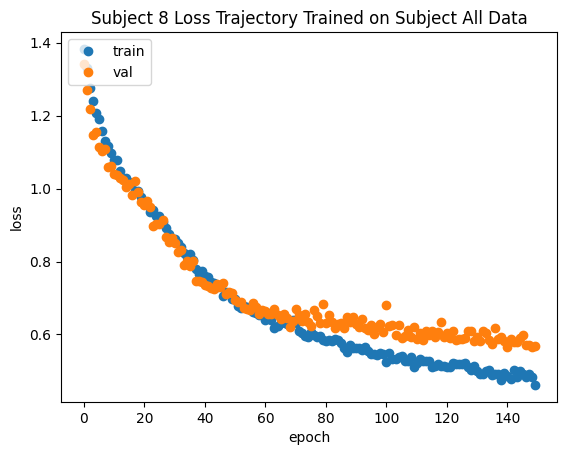

Test accuracy of the hybrid CNN-LSTM model: 0.8723404407501221


In [9]:
for id in range(9):
    subject_train_valid_ind = np.where(person_train_valid == id)
    subject_train_valid_ind = subject_train_valid_ind[0]
    subject_X_train_valid = X_train_valid[subject_train_valid_ind]
    subject_y_train_valid = y_train_valid[subject_train_valid_ind]
    subject_test_ind = np.where(person_test == id)
    subject_test_ind = subject_test_ind[0]
    subject_X_test = X_test[subject_test_ind]
    subject_y_test = y_test[subject_test_ind]
    print(np.shape(subject_X_train_valid))
    print(np.shape(subject_y_train_valid))
    print(np.shape(subject_X_test))
    print(np.shape(subject_y_test))

    rest_train_valid_ind = np.setdiff1d(np.arange(len(person_train_valid)), subject_train_valid_ind)
    rest_X_train_valid = X_train_valid[rest_train_valid_ind]
    rest_y_train_valid = y_train_valid[rest_train_valid_ind]
    print(np.shape(rest_X_train_valid))
    print(np.shape(rest_y_train_valid))

    subject_X_test_prep = test_data_prep(subject_X_test) 
    ind_valid = np.random.choice(len(subject_X_train_valid), int(np.floor(len(subject_X_train_valid)/6)), replace=False)
    ind_train = np.array(list(set(range(len(subject_X_train_valid))).difference(set(ind_valid))))
    (subject_x_train_split, subject_x_valid_split) = subject_X_train_valid[ind_train], subject_X_train_valid[ind_valid] 
    (subject_y_train_split, subject_y_valid_split) = subject_y_train_valid[ind_train], subject_y_train_valid[ind_valid]
    subject_x_train,subject_y_train = train_data_prep(subject_x_train_split,subject_y_train_split,2,2,True)
    subject_x_valid,subject_y_valid = train_data_prep(subject_x_valid_split,subject_y_valid_split,2,2,True)
    subject_y_train = to_categorical(subject_y_train, 4)
    subject_y_valid = to_categorical(subject_y_valid, 4)
    subject_y_test = to_categorical(subject_y_test, 4)
    subject_x_train = subject_x_train.reshape(subject_x_train.shape[0], subject_x_train.shape[1], subject_x_train.shape[2], 1)
    subject_x_valid = subject_x_valid.reshape(subject_x_valid.shape[0], subject_x_valid.shape[1], subject_x_train.shape[2], 1)
    subject_x_test = subject_X_test_prep.reshape(subject_X_test_prep.shape[0], subject_X_test_prep.shape[1], subject_X_test_prep.shape[2], 1)
    subject_x_train = np.swapaxes(subject_x_train, 1,3)
    subject_x_train = np.swapaxes(subject_x_train, 1,2)
    subject_x_valid = np.swapaxes(subject_x_valid, 1,3)
    subject_x_valid = np.swapaxes(subject_x_valid, 1,2)
    subject_x_test = np.swapaxes(subject_x_test, 1,3)
    subject_x_test = np.swapaxes(subject_x_test, 1,2)

    print(np.shape(rest_X_train_valid))
    print(np.shape(rest_y_train_valid))
    ind_valid = np.random.choice(len(rest_X_train_valid), int(np.floor(len(rest_X_train_valid)/6)), replace=False)
    ind_train = np.array(list(set(range(len(rest_X_train_valid))).difference(set(ind_valid))))
    (rest_x_train_split, rest_x_valid_split) = rest_X_train_valid[ind_train], rest_X_train_valid[ind_valid] 
    (rest_y_train_split, rest_y_valid_split) = rest_y_train_valid[ind_train], rest_y_train_valid[ind_valid]
    rest_x_train,rest_y_train = train_data_prep(rest_x_train_split,rest_y_train_split,2,2,True)
    rest_x_valid,rest_y_valid = train_data_prep(rest_x_valid_split,rest_y_valid_split,2,2,True)
    rest_y_train = to_categorical(rest_y_train, 4)
    rest_y_valid = to_categorical(rest_y_valid, 4)
    rest_x_train = rest_x_train.reshape(rest_x_train.shape[0], rest_x_train.shape[1], rest_x_train.shape[2], 1)
    rest_x_valid = rest_x_valid.reshape(rest_x_valid.shape[0], rest_x_valid.shape[1], rest_x_train.shape[2], 1)
    rest_x_train = np.swapaxes(rest_x_train, 1,3)
    rest_x_train = np.swapaxes(rest_x_train, 1,2)
    rest_x_valid = np.swapaxes(rest_x_valid, 1,3)
    rest_x_valid = np.swapaxes(rest_x_valid, 1,2)
    combined_x_train = np.vstack([rest_x_train, subject_x_train])
    combined_x_valid = np.vstack([rest_x_valid, subject_x_valid])
    combined_y_train = np.vstack([rest_y_train, subject_y_train])
    combined_y_valid = np.vstack([rest_y_valid, subject_y_valid])

    print(np.shape(combined_x_train))
    print(np.shape(combined_x_valid))
    print(np.shape(combined_y_train))
    print(np.shape(combined_y_valid))

    hybrid_cnn_lstm_model = hybrid()
    # ADAM
    # Compiling the model
    hybrid_cnn_lstm_optimizer = keras.optimizers.Adam(lr=learning_rate)
    hybrid_cnn_lstm_model.compile(loss='categorical_crossentropy',
                    optimizer=hybrid_cnn_lstm_optimizer,
                    metrics=['accuracy'])

    # Training and validating the model
    hybrid_cnn_lstm_model_results = hybrid_cnn_lstm_model.fit(combined_x_train,
                combined_y_train,
                batch_size=64,
                epochs=epochs,
                validation_data=(combined_x_valid, combined_y_valid), verbose=True)

    # Plotting accuracy trajectory
    plt.plot( hybrid_cnn_lstm_model_results.history['accuracy'])
    plt.plot( hybrid_cnn_lstm_model_results.history['val_accuracy'])
    plt.title('Subject ' + str(id) + ' Accuracy Trajectory Trained on Subject All Data')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot( hybrid_cnn_lstm_model_results.history['loss'],'o')
    plt.plot( hybrid_cnn_lstm_model_results.history['val_loss'],'o')
    plt.title('Subject '  + str(id) + ' Loss Trajectory Trained on Subject All Data')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    hybrid_cnn_lstm_score = hybrid_cnn_lstm_model.evaluate(subject_x_test, subject_y_test, verbose=0)
    print('Test accuracy of the hybrid CNN-LSTM model:',hybrid_cnn_lstm_score[1])
    